In [1]:
# !pip install tensorflow
# !pip install wordcloud
# !pip install pycountry
# !pip install langdetect
# !pip install prettytable

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
import itertools
from itertools import combinations
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from collections import Counter
import nltk
from nltk.corpus import stopwords, words as nltk_words
from nltk.tokenize import word_tokenize
# from wordcloud import WordCloud
import matplotlib.cm as cm
import re
from nltk.stem import WordNetLemmatizer
import heapq
from tqdm import tqdm

# import pycountry
# from langdetect import detect
# from prettytable import PrettyTable

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\21301610\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\21301610\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\21301610\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# LOAD DATA FILES AND COMBINE

In [3]:
df = pd.read_csv('D:/21301648/tweets-1.csv')
df1 = pd.read_csv('D:/21301648/tweets-2.csv')
df2 = pd.read_csv('D:/21301648/tweets-3.csv')
df3 = pd.read_csv('D:/21301648/tweets-4.csv')
df4 = pd.read_csv('D:/21301648/tweets-5.csv')
df5 = pd.read_csv('D:/21301648/tweets-6.csv')
df6 = pd.read_csv('D:/21301648/tweets.csv')
comb = [df, df1, df2, df3, df4, df5, df6]
df = pd.concat(comb)
print(df.shape)
df.head(5)

C:\Users\21301610\AppData\Local\Temp\ipykernel_18276\2817328329.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('D:/21301648/tweets-2.csv')
C:\Users\21301610\AppData\Local\Temp\ipykernel_18276\2817328329.py:6: DtypeWarning: Columns (6,7,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('D:/21301648/tweets-6.csv')


(337702, 19)


,Tweet Id,Tweet URL,Tweet Posted Time,Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,User Id,Name,Username,User Bio,Verified or Non-Verified,Profile URL,User Followers,User Following,User Account Creation Date
0,"""1570828309159907328""",https://twitter.com/syfalzawy9/status/15708283...,16 Sep 2022 17:33:48,"""#Web3\n#Metaverse\n#Bitcoin\n#HZM_COIN\n#Nemo...",Tweet,"""Twitter for Android""",0,0,"""""",qht,"""1524437405905956865""","""سيف العزاوي""",syfalzawy9,"""HZM coin""",Non-Verified,https://twitter.com/syfalzawy9,48.0,222.0,11-May-2022 17:13:08
1,"""1570828309495427078""",https://twitter.com/dusaki848/status/157082830...,16 Sep 2022 17:33:48,"""ABBY2021 found #bitcoin in a Blue vault at th...",Tweet,"""Twitter for Android""",0,0,"""""",English,"""416430263""","""Steve pinson""",dusaki848,"""""",Non-Verified,https://twitter.com/dusaki848,26.0,13.0,19-Nov-2011 17:38:31
2,"""1570828310015508481""",https://twitter.com/RanjitP81573700/status/157...,16 Sep 2022 17:33:48,"""ADSCOIN THE PRIDE OF INDIA. \nWE HAVE..\nADSC...",ReTweet,"""Twitter for Android""",0,0,"""""",English,"""1568999999685656582""","""Ranjit Pawara""",RanjitP81573700,"""""",Non-Verified,https://twitter.com/RanjitP81573700,73.0,401.0,11-Sep-2022 16:29:19
3,"""1570828310715965440""",https://twitter.com/ImranaMuntasir/status/1570...,16 Sep 2022 17:33:48,"""💥BREAKING: First solar-power Bitcoin mining p...",ReTweet,"""Twitter for Android""",0,0,"""""",English,"""1322188513543147521""","""Imran Muntasir""",ImranaMuntasir,"""Computer Scientist and A\nHodler of $RSR $MAH...",Non-Verified,https://twitter.com/ImranaMuntasir,336.0,2951.0,30-Oct-2020 14:48:17
4,"""1570828311596761089""",https://twitter.com/dulal6654/status/157082831...,16 Sep 2022 17:33:48,"""Good luck Good Project\n\n@hahshhzg\n@mehwish...",Tweet,"""Twitter Web App""",0,0,"""""",English,"""1569606774503907329""","""dulal ahamed""",dulal6654,"""13-09-2022""",Non-Verified,https://twitter.com/dulal6654,18.0,53.0,13-Sep-2022 08:40:04


In [4]:
# shihab
# df = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-1.csv')
# df1 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-2.csv')
# df2 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-3.csv')
# df3 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-4.csv')
# df4 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-5.csv')
# df5 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-6.csv')
# df6 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets.csv')

# # raiyan
# # df = pd.read_csv('/content/drive/MyDrive/data/tweets.csv')
# # df1 = pd.read_csv('/content/drive/MyDrive/data/tweets-1.csv')
# # df2 = pd.read_csv('/content/drive/MyDrive/data/tweets-2.csv')
# # df3 = pd.read_csv('/content/drive/MyDrive/data/tweets-3.csv')
# # df4 = pd.read_csv('/content/drive/MyDrive/data/tweets-4.csv')
# # df5 = pd.read_csv('/content/drive/MyDrive/data/tweets-5.csv')
# # df6 = pd.read_csv('/content/drive/MyDrive/data/tweets-6.csv')

comb = [df, df1, df2, df3, df4, df5, df6]
df = pd.concat(comb)
print(df.shape)

(625404, 19)


# PREPROCESSING

In [5]:
# Convert 'Tweet Content' column to lowercase
df['Tweet Content'] = df['Tweet Content'].str.lower()

# Remove URLs from text
def remove_urls(text):
    return re.sub(r'http\S+', '', text)
df['Tweet Content'] = df['Tweet Content'].apply(remove_urls)

#remove other language tweets
df = df.loc[df['Tweet Language']=="English"]
print(df.shape)

# remove data with NaN values in these columns and convert followers and following column to integers

df.dropna(subset=['User Followers', 'User Following', "Retweets Received"], inplace=True)

df['User Followers'] = df['User Followers'].astype(int)
df['User Following'] = df['User Following'].astype(int)
df['Retweets Received'] = df['Retweets Received'].astype(int)

#formatting date time (DD-MM-YY)(HH-MM-SS)

df['datetime'] = pd.to_datetime(df['Tweet Posted Time'], format='%d %b %Y %H:%M:%S')
df['date'] = df['datetime'].dt.date
print(df['date'].unique())

# to remove retweets we can remove duplicates in the "Tweet Content" feature

# print(df.nunique())
df.drop_duplicates(subset=['Tweet Id'], keep='first', inplace=True)
print(df.shape)

# Creating a column containing just the hashtags

pattern = r'#\w+'

# Extract hashtags from each tweet and store them in a new column
df['Hashtags'] = df['Tweet Content'].apply(lambda x: re.findall(pattern, x))



(469693, 19)
[datetime.date(2022, 9, 16) datetime.date(2022, 9, 15)
 datetime.date(2022, 9, 17)]
(253516, 21)


In [6]:
# Hashtag Lemmatization and keeping just the first instance of the hashtag

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize hashtags in tweet content
def lemmatize_hashtags(tweet):
    # Define regular expression pattern to find hashtags
    hashtag_pattern = r'#(\w+)'
    # Find all hashtags in the tweet content
    hashtags = re.findall(hashtag_pattern, tweet)
    # Iterate over hashtags
    for hashtag in hashtags:
        # Lemmatize the word
        lemmatized_hashtag = lemmatizer.lemmatize(hashtag, pos='a')
        # Replace the hashtag with lemmatized word
        tweet = tweet.replace(f'#{hashtag}', f'#{lemmatized_hashtag}')
    return tweet

# Apply the function to the "Tweet Content" column
df['Tweet Content'] = df['Tweet Content'].apply(lemmatize_hashtags)



In [7]:
print(df.columns)

Index(['Tweet Id', 'Tweet URL', 'Tweet Posted Time', 'Tweet Content',
       'Tweet Type', 'Client', 'Retweets Received', 'Likes Received',
       'Tweet Location', 'Tweet Language', 'User  Id', 'Name', 'Username',
       'User Bio', 'Verified or Non-Verified', 'Profile URL', 'User Followers',
       'User Following', 'User Account Creation Date', 'datetime', 'date',
       'Hashtags'],
      dtype='object')


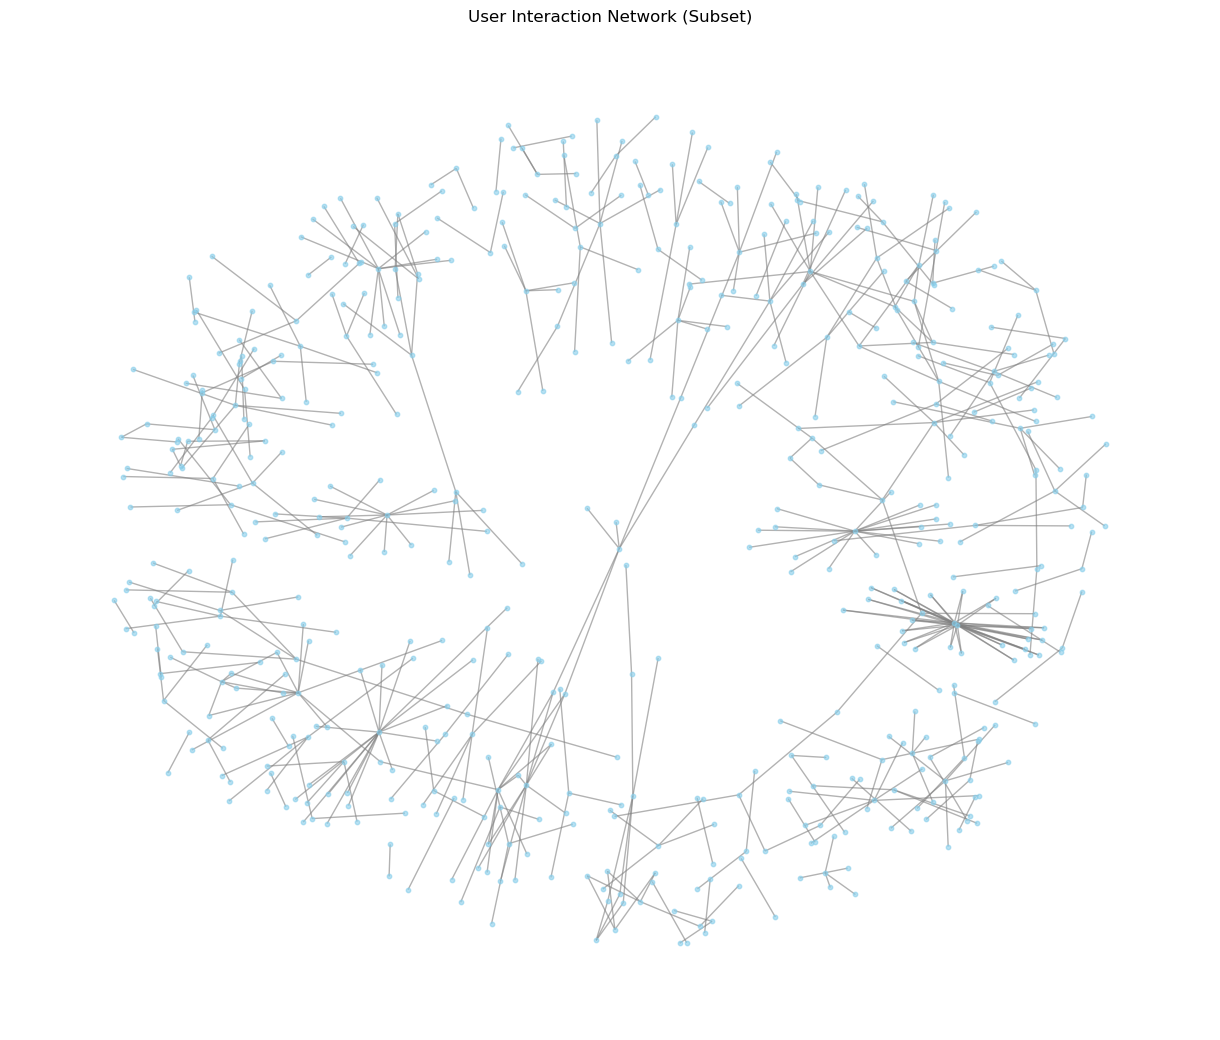

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



# Take a random subset of the dataset (e.g., 5%)
subset_fraction = 0.003
subset_df = df.sample(frac=subset_fraction, random_state=80)

# Create an empty graph
G = nx.Graph()

# Add nodes (usernames) to the graph
G.add_nodes_from(subset_df['Username'])

# Loop through each row in the subset DataFrame
for index, row in subset_df.iterrows():
    # Extract the source user (the user who posted the tweet)
    source_user = row['Username']

    # Extract the tweet content
    tweet_content = row['Tweet Content']

    # Check if the tweet is a retweet by looking for mentions in the tweet content
    retweet_users = [mention.strip('@') for mention in tweet_content.split() if '@' in mention]

    # Add edges between the source user and retweet users
    for retweet_user in retweet_users:
        if source_user != retweet_user:
            G.add_edge(source_user, retweet_user)

isolated_nodes = [n for n in G.nodes if G.degree(n) == 0]
G.remove_nodes_from(isolated_nodes)

# Use a spring layout for visualization
spring_pos = nx.spring_layout(G, k=0.15)

# Draw the graph with edges
plt.figure(figsize=(12, 10))
nx.draw(G, spring_pos, node_size=10, node_color='skyblue', edge_color='gray', with_labels=False, alpha=0.6)



plt.title('User Interaction Network (Subset)')
plt.show()


In [9]:
#ZOOM IN

# # Draw the graph with edges
# plt.figure(figsize=(10, 8))

# # Draw only a specific portion of the graph by adjusting the limits
# plt.xlim(0, 0.9)  # Adjust the x-axis limits as needed
# plt.ylim(-0.9, 0.5)  # Adjust the y-axis limits as needed

# nx.draw(G, spring_pos, node_size=10, node_color='skyblue', edge_color='gray', with_labels=False, alpha=0.6)

# plt.title('User Interaction Network (Subset)')
# plt.show()


In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



# Find the connected components
connected_components = list(nx.connected_components(G))

# Sort the components by size (number of nodes) in descending order
sorted_components = sorted(connected_components, key=len, reverse=True)

# Select the largest 10 components
largest_components = sorted_components[:10]

# Initialize a list to store the properties of each component
components_data = []

# Loop through each of the largest components
for i, component in enumerate(largest_components):
    component_graph = G.subgraph(component)

    num_nodes_component = len(component_graph.nodes())
    num_edges_component = len(component_graph.edges())
    clustering_coefficient = nx.average_clustering(component_graph)
    if num_nodes_component > 1:
        average_path_length = nx.average_shortest_path_length(component_graph)
    else:
        average_path_length = float('inf')  # Only one node means no path
    average_degree = sum(dict(component_graph.degree()).values()) / num_nodes_component
    degree_distribution = [list(dict(component_graph.degree()).values()).count(i) / float(num_nodes_component) for i in range(max(dict(component_graph.degree()).values()) + 1)]

    # Append the component properties to the list
    components_data.append({
        'Component': f'Component {i + 1}',
        'Number of Nodes': num_nodes_component,
        'Number of Edges': num_edges_component,
        'Clustering Coefficient': clustering_coefficient,
        'Average Path Length': average_path_length,
        'Average Degree': average_degree,

    })

# Create a DataFrame from the components data
components_df = pd.DataFrame(components_data)

# Display the DataFrame in a pretty table
print(components_df.to_string(index=False))

# Optionally, use a Jupyter notebook or a similar environment to display as an HTML table
display(components_df.style.set_caption("Top 10 Largest Components"))


   Component  Number of Nodes  Number of Edges  Clustering Coefficient  Average Path Length  Average Degree
 Component 1               46               54                     0.0             4.650242        2.347826
 Component 2               24               44                     0.0             1.840580        3.666667
 Component 3               19               19                     0.0             3.742690        2.000000
 Component 4               17               16                     0.0             1.882353        1.882353
 Component 5               17               16                     0.0             1.882353        1.882353
 Component 6               16               21                     0.0             2.466667        2.625000
 Component 7               11               10                     0.0             2.618182        1.818182
 Component 8               11               10                     0.0             1.818182        1.818182
 Component 9               1

,Component,Number of Nodes,Number of Edges,Clustering Coefficient,Average Path Length,Average Degree
0,Component 1,46,54,0.000000,4.650242,2.347826
1,Component 2,24,44,0.000000,1.840580,3.666667
2,Component 3,19,19,0.000000,3.742690,2.000000
3,Component 4,17,16,0.000000,1.882353,1.882353
4,Component 5,17,16,0.000000,1.882353,1.882353
5,Component 6,16,21,0.000000,2.466667,2.625000
6,Component 7,11,10,0.000000,2.618182,1.818182
7,Component 8,11,10,0.000000,1.818182,1.818182
8,Component 9,10,9,0.000000,1.800000,1.800000
9,Component 10,9,9,0.000000,2.222222,2.000000


## Community detection grapgh
here each tweet is a node (node x), then if each retweet (user who retweeted) of that tweet is node 1, 2, 3 then there will be edges from node x to node 1, 2,3

# Why cluster coeff is zero
As each retweet is the neibours of the main tweet, when someone for example retweets node 1, it is actually retweeting the main tweeet node x. so there is no edge between the neighbours.


C:\ProgramData\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


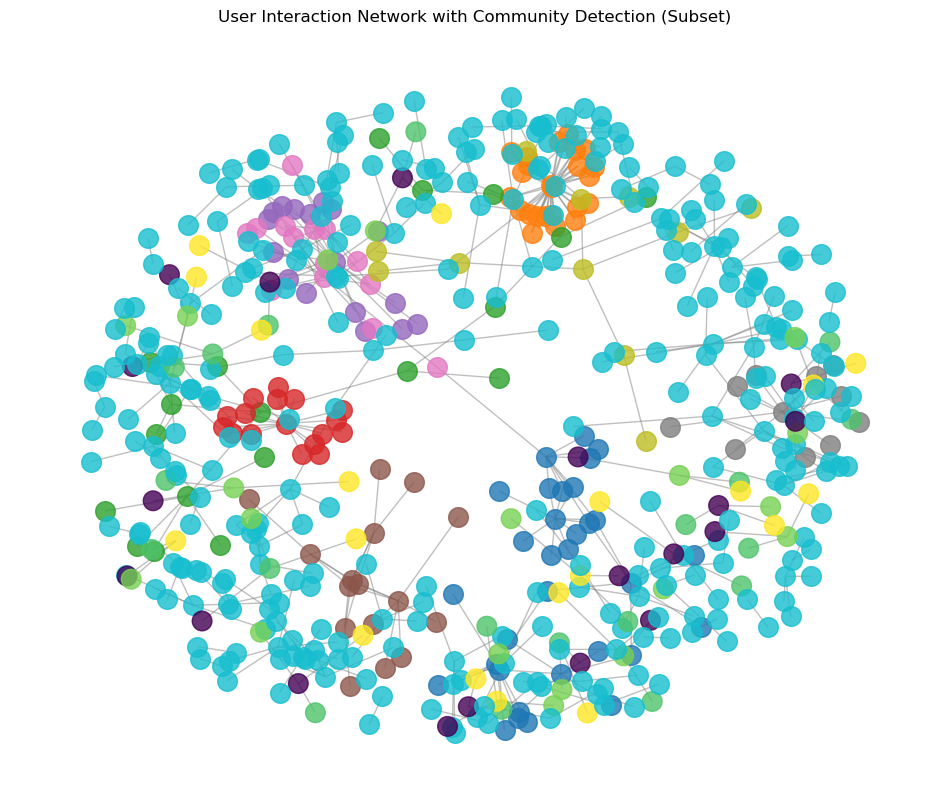

In [11]:
# # Take a subset of the dataset (5%)
# subset_size = int(0.05 * len(df))
# subset_df = df.sample(n=subset_size, random_state=42)

# Create an empty graph
G = nx.Graph()

# Add nodes (usernames) to the graph
G.add_nodes_from(subset_df['Username'])

# Loop through each row in the subset DataFrame
for index, row in subset_df.iterrows():
    # Extract the source user (the user who posted the tweet)
    source_user = row['Username']

    # Extract the tweet content
    tweet_content = row['Tweet Content']

    # Check if the tweet is a retweet by looking for mentions in the tweet content
    retweet_users = [mention.strip('@') for mention in tweet_content.split() if '@' in mention]

    # Add edges between the source user and retweet users
    for retweet_user in retweet_users:
        if source_user != retweet_user:
            G.add_edge(source_user, retweet_user)

isolated_nodes = [n for n in G.nodes if G.degree(n) == 0]
G.remove_nodes_from(isolated_nodes)

# Detect communities using the greedy modularity approach
communities = list(greedy_modularity_communities(G))





# Visualize the network with community detection
plt.figure(figsize=(12, 10))

# Position nodes using the spring layout
layout = nx.spring_layout(G, k=0.15)

# Draw nodes with different colors for each community
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, layout, nodelist=list(community), node_color=plt.cm.tab10(i), node_size=200, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, layout, edge_color='gray', alpha=0.5)



plt.title('User Interaction Network with Community Detection (Subset)')
plt.axis('off')
plt.show()


In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



# Find the connected components
connected_components = list(nx.connected_components(G))

# Sort the components by size (number of nodes) in descending order
sorted_components = sorted(connected_components, key=len, reverse=True)

# Select the largest 10 components
largest_components = sorted_components[:10]

# Initialize a list to store the properties of each component
components_data = []

# Function to calculate the local clustering coefficient for a node
def local_clustering_coefficient(G, node):
    neighbors = list(G.neighbors(node))
    k_i = len(neighbors)
    if k_i < 2:
        return 0.0
    L_i = 0
    for neighbor in neighbors:
        for neighbor_of_neighbor in G.neighbors(neighbor):
            if neighbor_of_neighbor in neighbors:
                L_i += 1
    L_i = L_i / 2  # Each link counted twice
    return (2 * L_i) / (k_i * (k_i - 1))

# Loop through each of the largest components
for i, component in enumerate(largest_components):
    component_graph = G.subgraph(component)

    num_nodes_component = len(component_graph.nodes())
    num_edges_component = len(component_graph.edges())

    # Calculate the clustering coefficient manually
    clustering_coefficients = [local_clustering_coefficient(component_graph, node) for node in component_graph.nodes()]
    clustering_coefficient = sum(clustering_coefficients) / len(clustering_coefficients) if clustering_coefficients else 0.0

    if num_nodes_component > 1:
        average_path_length = nx.average_shortest_path_length(component_graph)
    else:
        average_path_length = float('inf')  # Only one node means no path

    average_degree = sum(dict(component_graph.degree()).values()) / num_nodes_component

    degree_distribution = [list(dict(component_graph.degree()).values()).count(i) / float(num_nodes_component) for i in range(max(dict(component_graph.degree()).values()) + 1)]

    # Append the component properties to the list
    components_data.append({
        'Component': f'Component {i + 1}',
        'Number of Nodes': num_nodes_component,
        'Number of Edges': num_edges_component,
        'Clustering Coefficient': clustering_coefficient,
        'Average Path Length': average_path_length,
        'Average Degree': average_degree,

    })

# Create a DataFrame from the components data
components_df = pd.DataFrame(components_data)

# Display the DataFrame in a pretty table
print(components_df.to_string(index=False))

# Optionally, use a Jupyter notebook or a similar environment to display as an HTML table
display(components_df.style.set_caption("Top 10 Largest Components"))


   Component  Number of Nodes  Number of Edges  Clustering Coefficient  Average Path Length  Average Degree
 Component 1               46               54                     0.0             4.650242        2.347826
 Component 2               24               44                     0.0             1.840580        3.666667
 Component 3               19               19                     0.0             3.742690        2.000000
 Component 4               17               16                     0.0             1.882353        1.882353
 Component 5               17               16                     0.0             1.882353        1.882353
 Component 6               16               21                     0.0             2.466667        2.625000
 Component 7               11               10                     0.0             2.618182        1.818182
 Component 8               11               10                     0.0             1.818182        1.818182
 Component 9               1

,Component,Number of Nodes,Number of Edges,Clustering Coefficient,Average Path Length,Average Degree
0,Component 1,46,54,0.000000,4.650242,2.347826
1,Component 2,24,44,0.000000,1.840580,3.666667
2,Component 3,19,19,0.000000,3.742690,2.000000
3,Component 4,17,16,0.000000,1.882353,1.882353
4,Component 5,17,16,0.000000,1.882353,1.882353
5,Component 6,16,21,0.000000,2.466667,2.625000
6,Component 7,11,10,0.000000,2.618182,1.818182
7,Component 8,11,10,0.000000,1.818182,1.818182
8,Component 9,10,9,0.000000,1.800000,1.800000
9,Component 10,9,9,0.000000,2.222222,2.000000


**FULL DATASET**

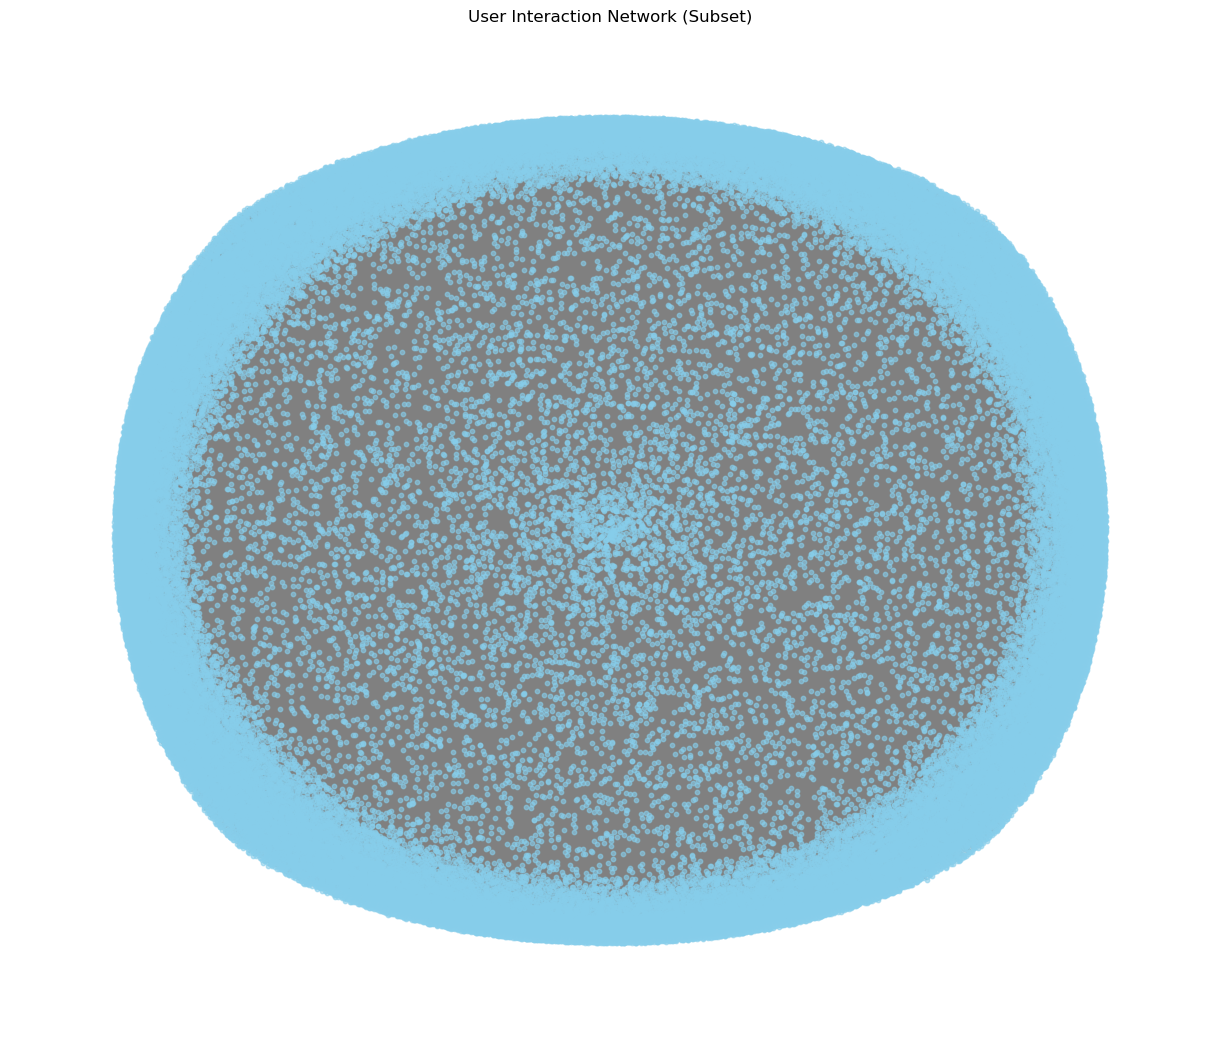

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt




subset_df = df

# Create an empty graph
G = nx.Graph()

# Add nodes (usernames) to the graph
G.add_nodes_from(subset_df['Username'])

# Loop through each row in the subset DataFrame
for index, row in subset_df.iterrows():
    # Extract the source user (the user who posted the tweet)
    source_user = row['Username']

    # Extract the tweet content
    tweet_content = row['Tweet Content']

    # Check if the tweet is a retweet by looking for mentions in the tweet content
    retweet_users = [mention.strip('@') for mention in tweet_content.split() if '@' in mention]

    # Add edges between the source user and retweet users
    for retweet_user in retweet_users:
        if source_user != retweet_user:
            G.add_edge(source_user, retweet_user)

isolated_nodes = [n for n in G.nodes if G.degree(n) == 0]
G.remove_nodes_from(isolated_nodes)

# Use a spring layout for visualization
spring_pos = nx.spring_layout(G, k=0.15)

# Draw the graph with edges
plt.figure(figsize=(12, 10))
nx.draw(G, spring_pos, node_size=10, node_color='skyblue', edge_color='gray', with_labels=False, alpha=0.6)



plt.title('User Interaction Network (Subset)')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


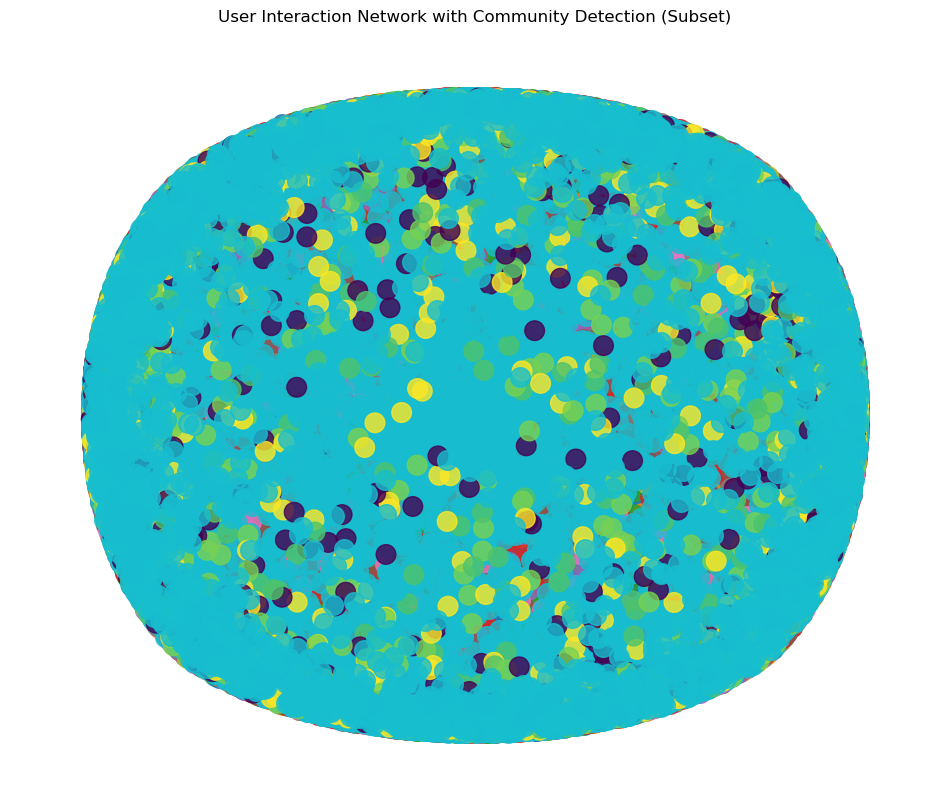

In [14]:


# Create an empty graph
G = nx.Graph()

# Add nodes (usernames) to the graph
G.add_nodes_from(subset_df['Username'])

# Loop through each row in the subset DataFrame
for index, row in subset_df.iterrows():
    # Extract the source user (the user who posted the tweet)
    source_user = row['Username']

    # Extract the tweet content
    tweet_content = row['Tweet Content']

    # Check if the tweet is a retweet by looking for mentions in the tweet content
    retweet_users = [mention.strip('@') for mention in tweet_content.split() if '@' in mention]

    # Add edges between the source user and retweet users
    for retweet_user in retweet_users:
        if source_user != retweet_user:
            G.add_edge(source_user, retweet_user)

isolated_nodes = [n for n in G.nodes if G.degree(n) == 0]
G.remove_nodes_from(isolated_nodes)

# Detect communities using the greedy modularity approach
communities = list(greedy_modularity_communities(G))

# Visualize the network with community detection
plt.figure(figsize=(12, 10))

# Position nodes using the spring layout
layout = nx.spring_layout(G, k=0.15)

# Draw nodes with different colors for each community
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, layout, nodelist=list(community), node_color=plt.cm.tab10(i), node_size=200, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, layout, edge_color='gray', alpha=0.5)



plt.title('User Interaction Network with Community Detection (Subset)')
plt.axis('off')
plt.show()


In [15]:
import networkx as nx
import numpy as np
import pandas as pd

# Assume communities is a list of lists where each inner list represents a community
# communities = [...]

# Calculate community sizes
community_sizes = [len(community) for community in communities]

# Calculate community densities
community_densities = []
community_num_nodes = []
community_num_edges = []
community_clustering_coeff = []
community_avg_path_length = []
community_avg_degree = []

for community in communities:
    subgraph = G.subgraph(community)
    density = nx.density(subgraph)
    num_nodes = subgraph.number_of_nodes()
    num_edges = subgraph.number_of_edges()
    clustering_coeff = nx.average_clustering(subgraph)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    avg_degree = 2 * num_edges / num_nodes

    community_densities.append(density)
    community_num_nodes.append(num_nodes)
    community_num_edges.append(num_edges)
    community_clustering_coeff.append(clustering_coeff)
    community_avg_path_length.append(avg_path_length)
    community_avg_degree.append(avg_degree)

# Calculate community centralities (mean centrality for each community)
community_centralities = []
for community in communities:
    subgraph = G.subgraph(community)
    centralities = nx.degree_centrality(subgraph)
    mean_centrality = np.mean(list(centralities.values()))
    community_centralities.append(mean_centrality)

# Calculate community cohesion (mean clustering coefficient for each community)
community_cohesion = []
for community in communities:
    subgraph = G.subgraph(community)
    clustering_coeff = nx.clustering(subgraph)
    mean_clustering_coeff = np.mean(list(clustering_coeff.values()))
    community_cohesion.append(mean_clustering_coeff)

# Sort the communities by size in descending order and select the top 5
sorted_indices = np.argsort(community_sizes)[::-1][:5]

# Create a DataFrame to display the results
data = {
    'Community': [i+1 for i in sorted_indices],
    'Size': [community_sizes[i] for i in sorted_indices],
    'Density': [community_densities[i] for i in sorted_indices],
    'Number of Nodes': [community_num_nodes[i] for i in sorted_indices],
    'Number of Edges': [community_num_edges[i] for i in sorted_indices],
    'Average Path Length': [community_avg_path_length[i] for i in sorted_indices],
    'Average Degree': [community_avg_degree[i] for i in sorted_indices],
    'Mean Centrality': [community_centralities[i] for i in sorted_indices],
}

df = pd.DataFrame(data)
print(df.to_string(index=False))

 Community  Size  Density  Number of Nodes  Number of Edges  Average Path Length  Average Degree  Mean Centrality
         1 11414 0.000367            11414            23895             4.481839        4.186963         0.000367
         2  9467 0.000250             9467            11213             3.901057        2.368860         0.000250
         3  7586 0.000520             7586            14969             3.009789        3.946480         0.000520
         4  7222 0.000438             7222            11430             4.025407        3.165328         0.000438
         5  5259 0.000393             5259             5428             2.659996        2.064271         0.000393


In [16]:
import networkx as nx
import numpy as np
import pandas as pd

# Assume communities is a list of lists where each inner list represents a community
# communities = [...]

# Calculate community sizes
community_sizes = [len(community) for community in communities]

# Find the top 5 communities by size
sorted_indices = np.argsort(community_sizes)[::-1][:5]

# Create a DataFrame to store the results
columns = ['Community', 'Top User', 'Degree Centrality']
df = pd.DataFrame(columns=columns)

for i in sorted_indices:
    community = communities[i]
    subgraph = G.subgraph(community)

    # Calculate degree centrality for the community
    degree_centrality = nx.degree_centrality(subgraph)

    # Find the top 10 users with the highest traffic
    top_users_traffic = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

    # Create a temporary DataFrame for the current community
    top_users = [user for user, _ in top_users_traffic]
    centralities = [centrality for _, centrality in top_users_traffic]
    num_users = len(top_users)
    temp_df = pd.DataFrame({'Community': [i+1] * num_users, 'Top User': top_users, 'Degree Centrality': centralities})

    # Concatenate the temporary DataFrame with the main DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)

print(df)

   Community         Top User  Degree Centrality
0          1    puritylekutit           0.044423
1          1   von_programmer           0.039779
2          1        kaka_aero           0.039078
3          1   JamaicaMfoniso           0.035223
4          1         khosny30           0.031368
5          1     kaka54452000           0.031280
6          1    wilsonkahrynn           0.029878
7          1       keekee3475           0.024358
8          1   ulicioussisaah           0.024183
9          1         "@saylor           0.023394
10         2    clean28468721           0.203676
11         2      you97953679           0.182654
12         2    hello23643181           0.175681
13         2     maan84538953           0.090640
14         2    killerGirl000           0.076590
15         2  Maryamb56715977           0.072047
16         2    Adnan25572221           0.069935
17         2    killerGurl000           0.061483
18         2    Adnan50355635           0.060955
19         2    sunn

##OTHERS

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



# Find the connected components
connected_components = list(nx.connected_components(G))

# Sort the components by size (number of nodes) in descending order
sorted_components = sorted(connected_components, key=len, reverse=True)

# Select the largest 10 components
largest_components = sorted_components[:10]

# Initialize a list to store the properties of each component
components_data = []

# Function to calculate the local clustering coefficient for a node
def local_clustering_coefficient(G, node):
    neighbors = list(G.neighbors(node))
    k_i = len(neighbors)
    if k_i < 2:
        return 0.0
    L_i = 0
    for neighbor in neighbors:
        for neighbor_of_neighbor in G.neighbors(neighbor):
            if neighbor_of_neighbor in neighbors:
                L_i += 1
    L_i = L_i / 2  # Each link counted twice
    return (2 * L_i) / (k_i * (k_i - 1))

# Loop through each of the largest components
for i, component in enumerate(largest_components):
    component_graph = G.subgraph(component)

    num_nodes_component = len(component_graph.nodes())
    num_edges_component = len(component_graph.edges())

    # Calculate the clustering coefficient manually
    clustering_coefficients = [local_clustering_coefficient(component_graph, node) for node in component_graph.nodes()]
    clustering_coefficient = sum(clustering_coefficients) / len(clustering_coefficients) if clustering_coefficients else 0.0

    if num_nodes_component > 1:
        average_path_length = nx.average_shortest_path_length(component_graph)
    else:
        average_path_length = float('inf')  # Only one node means no path

    average_degree = sum(dict(component_graph.degree()).values()) / num_nodes_component

    degree_distribution = [list(dict(component_graph.degree()).values()).count(i) / float(num_nodes_component) for i in range(max(dict(component_graph.degree()).values()) + 1)]

    # Append the component properties to the list
    components_data.append({
        'Component': f'Component {i + 1}',
        'Number of Nodes': num_nodes_component,
        'Number of Edges': num_edges_component,
        'Clustering Coefficient': clustering_coefficient,
        'Average Path Length': average_path_length,
        'Average Degree': average_degree,

    })

# Create a DataFrame from the components data
components_df = pd.DataFrame(components_data)

# Display the DataFrame in a pretty table
print(components_df.to_string(index=False))

# Optionally, use a Jupyter notebook or a similar environment to display as an HTML table
display(components_df.style.set_caption("Top 10 Largest Components"))


   Component  Number of Nodes  Number of Edges  Clustering Coefficient  Average Path Length  Average Degree
 Component 1            60607           101501                0.014855             5.157711        3.349481
 Component 2               44               49                0.000000             5.358351        2.227273
 Component 3               35               53                0.089796             3.178151        3.028571
 Component 4               32               31                0.000000             1.937500        1.937500
 Component 5               30               58                0.000000             3.108046        3.866667
 Component 6               26               30                0.000000             2.406154        2.307692
 Component 7               25               27                0.000000             2.560000        2.160000
 Component 8               23               33                0.000000             3.114625        2.869565
 Component 9               2

,Component,Number of Nodes,Number of Edges,Clustering Coefficient,Average Path Length,Average Degree
0,Component 1,60607,101501,0.014855,5.157711,3.349481
1,Component 2,44,49,0.000000,5.358351,2.227273
2,Component 3,35,53,0.089796,3.178151,3.028571
3,Component 4,32,31,0.000000,1.937500,1.937500
4,Component 5,30,58,0.000000,3.108046,3.866667
5,Component 6,26,30,0.000000,2.406154,2.307692
6,Component 7,25,27,0.000000,2.560000,2.160000
7,Component 8,23,33,0.000000,3.114625,2.869565
8,Component 9,22,21,0.000000,2.627706,1.909091
9,Component 10,21,21,0.000000,1.980952,2.000000


In [18]:
import networkx as nx
import numpy as np
import pandas as pd

# Assume communities is a list of lists where each inner list represents a community
# communities = [...]

# Calculate community sizes
community_sizes = [len(community) for community in communities]

# Calculate community densities
community_densities = []
for community in communities:
    subgraph = G.subgraph(community)
    density = nx.density(subgraph)
    community_densities.append(density)

# Calculate community centralities (mean centrality for each community)
community_centralities = []
for community in communities:
    subgraph = G.subgraph(community)
    centralities = nx.degree_centrality(subgraph)
    mean_centrality = np.mean(list(centralities.values()))
    community_centralities.append(mean_centrality)

# Calculate community cohesion (mean clustering coefficient for each community)
community_cohesion = []
for community in communities:
    subgraph = G.subgraph(community)
    clustering_coeff = nx.clustering(subgraph)
    mean_clustering_coeff = np.mean(list(clustering_coeff.values()))
    community_cohesion.append(mean_clustering_coeff)

# Calculate community similarity (only necessary if you need pairwise comparisons, otherwise can be skipped)
# Not including similarity in the table as it involves pairwise comparison
community_similarity = []
for i in range(len(communities)):
    for j in range(i+1, len(communities)):
        community_i = communities[i]
        community_j = communities[j]
        similarity = len(set(community_i) & set(community_j)) / len(set(community_i) | set(community_j))
        community_similarity.append(similarity)

# Create a DataFrame to display the results
data = {
    'Community': range(1, len(communities) + 1),
    'Size': community_sizes,
    'Density': community_densities,
    'Mean Centrality': community_centralities,
    'Mean Clustering Coefficient': community_cohesion
}

df = pd.DataFrame(data)
print(df)


      Community   Size   Density  Mean Centrality  Mean Clustering Coefficient
0             1  11414  0.000367         0.000367                     0.018676
1             2   9467  0.000250         0.000250                     0.001891
2             3   7586  0.000520         0.000520                     0.000440
3             4   7222  0.000438         0.000438                     0.003086
4             5   5259  0.000393         0.000393                     0.005051
...         ...    ...       ...              ...                          ...
2497       2498      2  1.000000         1.000000                     0.000000
2498       2499      2  1.000000         1.000000                     0.000000
2499       2500      2  1.000000         1.000000                     0.000000
2500       2501      2  1.000000         1.000000                     0.000000
2501       2502      2  1.000000         1.000000                     0.000000

[2502 rows x 5 columns]


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming the graph G is already created as per your previous code

# Find the connected components
connected_components = list(nx.connected_components(G))

# Sort the components by size (number of nodes) in descending order
sorted_components = sorted(connected_components, key=len, reverse=True)

# Select the largest 10 components
largest_components = sorted_components[:10]

# Initialize a list to store the properties of each component
components_data = []

# Loop through each of the largest components
for i, component in enumerate(largest_components):
    component_graph = G.subgraph(component)
    
    num_nodes_component = len(component_graph.nodes())
    num_edges_component = len(component_graph.edges())
    clustering_coefficient = nx.average_clustering(component_graph)
    if num_nodes_component > 1:
        average_path_length = nx.average_shortest_path_length(component_graph)
    else:
        average_path_length = float('inf')  # Only one node means no path
    average_degree = sum(dict(component_graph.degree()).values()) / num_nodes_component
    degree_distribution = [list(dict(component_graph.degree()).values()).count(i) / float(num_nodes_component) for i in range(max(dict(component_graph.degree()).values()) + 1)]
    
    # Append the component properties to the list
    components_data.append({
        'Component': f'Component {i + 1}',
        'Number of Nodes': num_nodes_component,
        'Number of Edges': num_edges_component,
        'Clustering Coefficient': clustering_coefficient,
        'Average Path Length': average_path_length,
        'Average Degree': average_degree,
        'Degree Distribution': degree_distribution
    })

# Create a DataFrame from the components data
components_df = pd.DataFrame(components_data)

# Display the DataFrame in a pretty table
print(components_df.to_string(index=False))

# Optionally, use a Jupyter notebook or a similar environment to display as an HTML table
# display(components_df.style.set_caption("Top 10 Largest Components"))


In [ ]:
# Number of connected components
num_connected_components = nx.number_connected_components(G)

# Number of nodes
num_nodes = len(G.nodes())

# Number of edges
num_edges = len(G.edges())

# Counter for components with only one node
single_node_component_count = 0

# Print the total number of connected components, nodes, and edges
print("Number of connected components:", num_connected_components)
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

# Check if the graph is connected
is_connected = nx.is_connected(G)

if is_connected:
    print("\nThe graph is connected.")
    # If the graph is connected, calculate metrics for the entire graph
    # Degree centrality
    degree_centrality = nx.degree_centrality(G)

    # List of top 10 users with the highest traffic
    top_users_traffic = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

    # Clustering coefficient
    clustering_coefficient = nx.average_clustering(G)

    # Average path length
    average_path_length = nx.average_shortest_path_length(G)

    # Average degree
    average_degree = sum(dict(G.degree()).values()) / num_nodes

    # Degree distribution
    degree_distribution = [list(dict(G.degree()).values()).count(i) / float(num_nodes) for i in range(max(dict(G.degree()).values()) + 1)]

    # Print the results for the entire graph
    print("\nMetrics for the entire graph:")
    print("Degree centrality:", degree_centrality)
    print("Top 10 users with highest traffic:", top_users_traffic)
    print("Degree distribution:", degree_distribution)
else:
    print("\nThe graph is disconnected.")
    # If the graph is disconnected, find connected components and calculate metrics for each component
    connected_components = list(nx.connected_components(G))
    component_sizes = [(i, len(component)) for i, component in enumerate(connected_components)]
    component_sizes.sort(key=lambda x: x[1], reverse=True)

    for i, (component_index, component_size) in enumerate(component_sizes[:10]):
        component = connected_components[component_index]
        component_graph = G.subgraph(component)
        num_nodes_component = len(component_graph.nodes())
        num_edges_component = len(component_graph.edges())

        if num_nodes_component == 1:
            single_node_component_count += 1
            continue  # Skip calculating properties for components with only one node

        degree_centrality = nx.degree_centrality(component_graph)
        top_users_traffic = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
        clustering_coefficient = nx.average_clustering(component_graph)
        average_path_length = nx.average_shortest_path_length(component_graph)
        average_degree = sum(dict(component_graph.degree()).values()) / num_nodes_component
        degree_distribution = [list(dict(component_graph.degree()).values()).count(i) / float(num_nodes_component) for i in range(max(dict(component_graph.degree()).values()) + 1)]

        # Print the results for each component
        print("\nMetrics for component", i+1)
        print("Number of nodes:", num_nodes_component)
        print("Number of edges:", num_edges_component)
        print("Degree centrality:", degree_centrality)
        print("Top 10 users with highest traffic:", top_users_traffic)
        print("Degree distribution:", degree_distribution)

# Print the total number of single-node components
print("\nTotal number of single-node components:", single_node_component_count)